# <center> Sign Language Classification

Dataset : https://www.kaggle.com/datasets/kabilan03/sign-language-dataset
        

In [ ]:
#importing packages
import os
import cv2
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
import seaborn as sns
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Model
from keras.models import model_from_json
from keras.preprocessing import image
from tensorflow.keras import optimizers
from tensorflow.keras.applications import Xception
from keras import applications

In [3]:
def load_subdata(data,SIZE):
    X1 = []
    y1 = []
    size = SIZE
    lbl = 0
    dic = {}
    for folder_name in os.listdir(data):
        
        Label = lbl
        dic[folder_name] = Label  
        count_img = 0;

        for filename in os.listdir(data + '/' + folder_name):
            image = tf.keras.preprocessing.image.load_img(data +'/'+ folder_name + '/' + filename,color_mode='rgb', target_size=(size,size))
            arr = keras.preprocessing.image.img_to_array(image)
            X1.append(np.array([arr]))
            y1.append(Label) 
        lbl +=1   
         
    X1 = np.asarray(X1).reshape(len(X1),SIZE,SIZE,3).astype(np.int16)
    y1 = np.asarray(y1).astype(np.uint8)
    return X1,y1, dic

In [4]:
X, y, label_dic = load_subdata(r'../input/sign-language-dataset/Sign Language Dataset',224)

In [5]:
from sklearn.utils import shuffle
X_new , y_new = shuffle(X, y, random_state=32)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_Test = train_test_split(X_new , y_new, test_size=0.15, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_Test , y_Test, test_size=0.5, random_state=42)


In [7]:
print("Training Images Shape (x train shape) :", X_train.shape)
print("Label of training images (y train shape) :",y_train.shape)

print("Validation Images Shape (x val shape) :",X_val.shape)
print("Label of Validation images (y val shape) :",y_val.shape)

print("Test Images Shape (x val shape) :",X_test.shape)
print("Label of Test images (y val shape) :",y_test.shape)

Training Images Shape (x train shape) : (1752, 224, 224, 3)
Label of training images (y train shape) : (1752,)
Validation Images Shape (x val shape) : (155, 224, 224, 3)
Label of Validation images (y val shape) : (155,)
Test Images Shape (x val shape) : (155, 224, 224, 3)
Label of Test images (y val shape) : (155,)


In [8]:
y_trainHot = np.uint8(to_categorical(y_train, num_classes = 10))
y_testHot = np.uint8(to_categorical(y_test, num_classes = 10))
y_valHot = np.uint8(to_categorical(y_val, num_classes = 10))

In [9]:
print("One hot encoded labels")
print(y_trainHot.shape)
print(y_testHot.shape)
print(y_valHot.shape)

One hot encoded labels
(1752, 10)
(155, 10)
(155, 10)


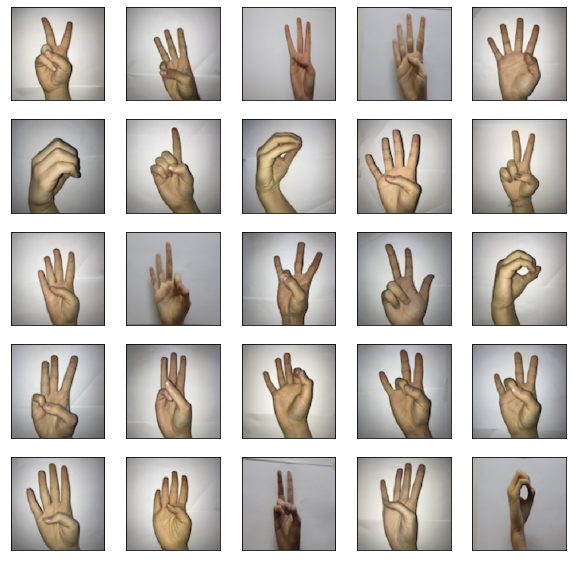

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    
plt.show()

In [11]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    y_test = y_testHot
    Y_pred = np.argmax(y_pred, axis=1)
    Y_Test = np.argmax(y_test, axis=1)
    
    class_names = list(label_dic.keys())
    print("Classification Report:")
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(Y_Test, Y_pred, target_names=class_names))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(Y_Test, Y_pred)
    
    accuracy = recall_score(Y_Test, Y_pred, average=None)
    precision=precision_score(Y_Test,Y_pred,average=None)

    #class_names = class_names
    class_names = list(label_dic.keys())

    print("Confusion Matrix:")

    print(cf_matrix)
    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    print("Accuracy for each class: ")
    
    for i in range(len(accuracy)):
        print(f"{class_names[i]}:  {format(accuracy[i]*100, '.2f')}%")

In [12]:
def plot_model(history):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
    fig.suptitle('Model Accuracy and Loss')

    ax1.plot(hist.history['accuracy'])
    ax1.plot(hist.history['val_accuracy'])
    ax1.title.set_text('Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train','Valid'],loc=4)

    ax2.plot(hist.history['loss'])
    ax2.plot(hist.history['val_loss'])
    ax2.title.set_text('Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train','Valid'],loc=1)

    fig.show()
    

# Xception

In [13]:
def Xception_Net():
    base_model =tf.keras.applications.Xception(input_shape = (224, 224, 3),include_top = False, classes=10) 
    model = Sequential()
    model.add(base_model)
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(units=10, activation='softmax'))
    return model

In [14]:
xcep_model=Xception_Net()

2022-04-09 06:05:12.971359: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 06:05:13.063157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 06:05:13.063917: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-09 06:05:13.065124: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 0s 0us/step


In [15]:
xcep_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy']) #when the learning rate was set to 0.01, the model showed a poor performance comparated to lr=0.0001
xcep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                1003530   
Total params: 21,865,010
Trainable params: 21,810,482
Non-trainable params: 54,528
_________________________________________________________________


In [16]:
hist =xcep_model.fit(X_train, y_trainHot, epochs=10,batch_size=64,validation_data=(X_val,y_valHot))

2022-04-09 06:05:18.654942: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-04-09 06:05:23.050955: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


28/28 [==============================] - 33s 787ms/step - loss: 1.0355 - accuracy: 0.6581 - val_loss: 4.1245 - val_accuracy: 0.1032
Epoch 2/10
28/28 [==============================] - 20s 725ms/step - loss: 0.0721 - accuracy: 0.9795 - val_loss: 2.0717 - val_accuracy: 0.3613
Epoch 3/10
28/28 [==============================] - 20s 724ms/step - loss: 0.0155 - accuracy: 0.9960 - val_loss: 0.5393 - val_accuracy: 0.8000
Epoch 4/10
28/28 [==============================] - 20s 725ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.2617 - val_accuracy: 0.9097
Epoch 5/10
28/28 [==============================] - 20s 724ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1101 - val_accuracy: 0.9871
Epoch 6/10
28/28 [==============================] - 20s 728ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9871
Epoch 7/10
28/28 [==============================] - 20s 725ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 0.9935
Epoch 8/10

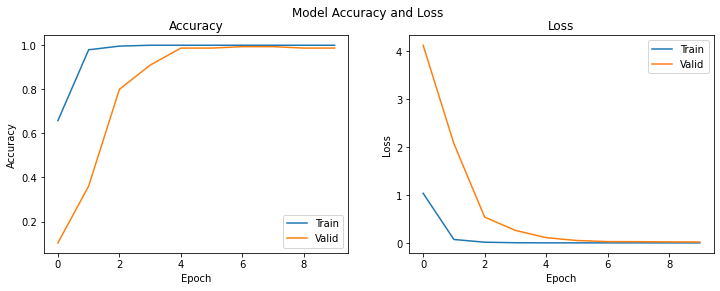

In [17]:
plot_model(hist)

In [18]:
model_Evaluate(xcep_model)

Classification Report:
              precision    recall  f1-score   support

           7       1.00      1.00      1.00        16
           2       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        13
           8       1.00      0.88      0.94        17
           0       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           4       1.00      0.94      0.97        16
           9       0.90      1.00      0.95        19
           6       0.95      1.00      0.97        19

    accuracy                           0.97       155
   macro avg       0.98      0.97      0.97       155
weighted avg       0.98      0.97      0.97       155

Confusion Matrix:
[[16  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  2  0]
 [ 0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [

# MobileNet

In [19]:
from tensorflow.keras.applications import MobileNetV2

In [20]:
def Mobile_Net():
    base_model = MobileNetV2(input_shape = (224, 224, 3),include_top = False, classes=10)
    #base_model =tf.keras.applications.Xception(input_shape = (229, 229, 3),include_top = False, classes=10) 
    model = Sequential()
    model.add(base_model)
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units=10, activation='softmax'))
    return model

In [21]:
MobileNet_model=Mobile_Net()

9420800/9406464 [==============================] - 0s 0us/step


In [22]:
MobileNet_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy']) #when the learning rate was set to 0.01, the model showed a poor performance comparated to lr=0.0001
MobileNet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 1280)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                627210    
Total params: 2,885,194
Trainable params: 2,851,082
Non-trainable params: 34,112
_________________________________________________________________


In [23]:
hist =MobileNet_model.fit(X_train, y_trainHot, epochs=30,batch_size=64,validation_data=(X_val,y_valHot))

Epoch 1/30
28/28 [==============================] - 14s 348ms/step - loss: 1.2839 - accuracy: 0.6090 - val_loss: 2.5821 - val_accuracy: 0.1935
Epoch 2/30
28/28 [==============================] - 9s 306ms/step - loss: 0.0905 - accuracy: 0.9692 - val_loss: 2.2978 - val_accuracy: 0.2516
Epoch 3/30
28/28 [==============================] - 8s 299ms/step - loss: 0.0172 - accuracy: 0.9971 - val_loss: 2.3331 - val_accuracy: 0.2968
Epoch 4/30
28/28 [==============================] - 9s 305ms/step - loss: 0.0069 - accuracy: 0.9989 - val_loss: 1.8040 - val_accuracy: 0.4258
Epoch 5/30
28/28 [==============================] - 9s 307ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 1.5505 - val_accuracy: 0.5032
Epoch 6/30
28/28 [==============================] - 9s 306ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.3110 - val_accuracy: 0.5742
Epoch 7/30
28/28 [==============================] - 9s 305ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.1292 - val_accuracy: 0.6645
Epoch

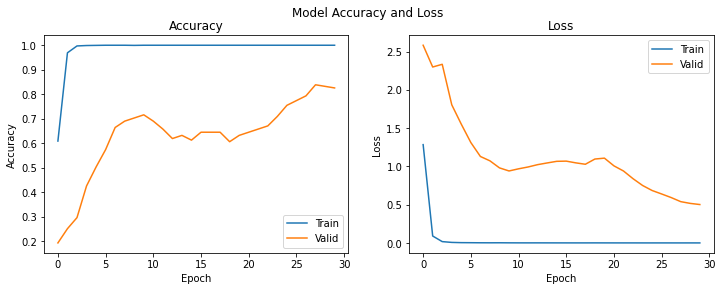

In [24]:
 plot_model(hist)

In [25]:
model_Evaluate(MobileNet_model)

Classification Report:
              precision    recall  f1-score   support

           7       0.79      0.69      0.73        16
           2       0.69      1.00      0.81        11
           5       1.00      0.69      0.82        13
           8       0.72      0.76      0.74        17
           0       1.00      1.00      1.00        22
           3       0.91      1.00      0.95        10
           1       1.00      1.00      1.00        12
           4       0.62      1.00      0.76        16
           9       0.94      0.79      0.86        19
           6       1.00      0.58      0.73        19

    accuracy                           0.84       155
   macro avg       0.87      0.85      0.84       155
weighted avg       0.87      0.84      0.84       155

Confusion Matrix:
[[11  0  0  2  0  0  0  3  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  1  0  3  0  0]
 [ 2  0  0 13  0  0  0  1  1  0]
 [ 0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [

# VGG16

In [26]:
from tensorflow.keras.applications import VGG16

In [27]:
def VGG16_Net():
    base_model = VGG16(input_shape = (224, 224, 3),include_top = False, classes=10)
    #base_model =tf.keras.applications.Xception(input_shape = (229, 229, 3),include_top = False, classes=10) 
    model = Sequential()
    model.add(base_model)
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units=10, activation='softmax'))
    return model

In [28]:
VGG16_model=VGG16_Net()

58900480/58889256 [==============================] - 0s 0us/step


In [29]:
VGG16_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy']) #when the learning rate was set to 0.01, the model showed a poor performance comparated to lr=0.0001
VGG16_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                250890    
Total params: 14,965,578
Trainable params: 14,965,578
Non-trainable params: 0
_________________________________________________________________


In [30]:
hist =VGG16_model.fit(X_train, y_trainHot, epochs=10,batch_size=64,validation_data=(X_val,y_valHot))

Epoch 1/10
28/28 [==============================] - 24s 598ms/step - loss: 2.9148 - accuracy: 0.2888 - val_loss: 1.0811 - val_accuracy: 0.6194
Epoch 2/10
28/28 [==============================] - 11s 385ms/step - loss: 0.7371 - accuracy: 0.7483 - val_loss: 0.3290 - val_accuracy: 0.8968
Epoch 3/10
28/28 [==============================] - 11s 384ms/step - loss: 0.3323 - accuracy: 0.8921 - val_loss: 0.1222 - val_accuracy: 0.9677
Epoch 4/10
28/28 [==============================] - 11s 384ms/step - loss: 0.1500 - accuracy: 0.9578 - val_loss: 0.1014 - val_accuracy: 0.9677
Epoch 5/10
28/28 [==============================] - 11s 385ms/step - loss: 0.1147 - accuracy: 0.9663 - val_loss: 0.0647 - val_accuracy: 0.9613
Epoch 6/10
28/28 [==============================] - 11s 385ms/step - loss: 0.0729 - accuracy: 0.9800 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 7/10
28/28 [==============================] - 11s 384ms/step - loss: 0.0582 - accuracy: 0.9829 - val_loss: 0.0356 - val_accuracy: 0.9871

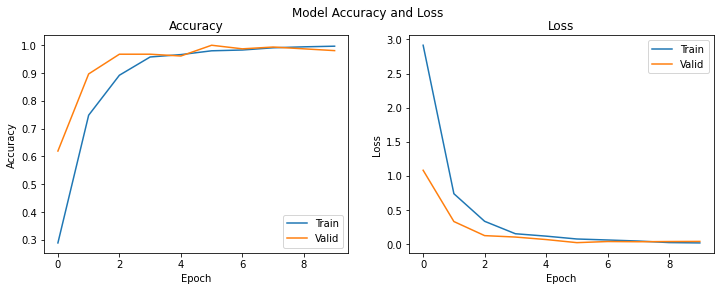

In [31]:
plot_model(hist)

In [32]:
model_Evaluate(VGG16_model)

Classification Report:
              precision    recall  f1-score   support

           7       1.00      0.88      0.93        16
           2       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        13
           8       0.94      1.00      0.97        17
           0       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           4       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        19
           6       0.95      1.00      0.97        19

    accuracy                           0.98       155
   macro avg       0.98      0.98      0.98       155
weighted avg       0.98      0.98      0.98       155

Confusion Matrix:
[[14  0  0  1  0  0  0  0  0  1]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [

# Transfer Learning with InceptionNet

In [33]:
from tensorflow.keras.applications import InceptionV3

In [34]:
def Inception_Net():
    base_model =InceptionV3(input_shape = (224, 224, 3), # Shape of our images
                                 include_top = False, 
                                 weights = 'imagenet',pooling='avg',classes=10)
    base_model.trainable = True
    for layer in base_model.layers[:50]:
        layer.trainable =  False 
    
    model = Sequential()
    model.add(base_model)
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units=10, activation='softmax'))
    return model

In [35]:
InceptionNet_model=Inception_Net()

87924736/87910968 [==============================] - 0s 0us/step


In [36]:
InceptionNet_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy']) #when the learning rate was set to 0.01, the model showed a poor performance comparated to lr=0.0001
InceptionNet_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 21,823,274
Trainable params: 21,276,954
Non-trainable params: 546,320
_________________________________________________________________


In [37]:
hist =InceptionNet_model.fit(X_train, y_trainHot, epochs=15,batch_size=64,validation_data=(X_val,y_valHot))

Epoch 1/15
28/28 [==============================] - 14s 271ms/step - loss: 1.2094 - accuracy: 0.6170 - val_loss: 2.8506 - val_accuracy: 0.1613
Epoch 2/15
28/28 [==============================] - 5s 191ms/step - loss: 0.1861 - accuracy: 0.9515 - val_loss: 2.7266 - val_accuracy: 0.2000
Epoch 3/15
28/28 [==============================] - 5s 190ms/step - loss: 0.0638 - accuracy: 0.9834 - val_loss: 2.0569 - val_accuracy: 0.4065
Epoch 4/15
28/28 [==============================] - 5s 194ms/step - loss: 0.0375 - accuracy: 0.9903 - val_loss: 1.3124 - val_accuracy: 0.6000
Epoch 5/15
28/28 [==============================] - 5s 190ms/step - loss: 0.0131 - accuracy: 0.9977 - val_loss: 0.7096 - val_accuracy: 0.7548
Epoch 6/15
28/28 [==============================] - 5s 190ms/step - loss: 0.0157 - accuracy: 0.9971 - val_loss: 0.4145 - val_accuracy: 0.8516
Epoch 7/15
28/28 [==============================] - 5s 190ms/step - loss: 0.0073 - accuracy: 0.9994 - val_loss: 0.1761 - val_accuracy: 0.9419
Epoch

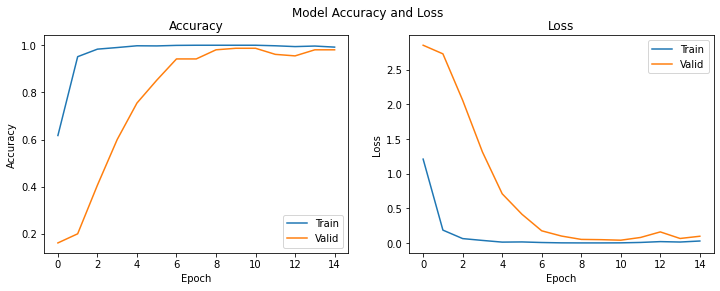

In [38]:
plot_model(hist)

In [39]:
model_Evaluate(InceptionNet_model)

Classification Report:
              precision    recall  f1-score   support

           7       1.00      0.81      0.90        16
           2       1.00      1.00      1.00        11
           5       0.87      1.00      0.93        13
           8       0.80      0.94      0.86        17
           0       1.00      1.00      1.00        22
           3       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        12
           4       1.00      0.62      0.77        16
           9       0.79      1.00      0.88        19
           6       1.00      1.00      1.00        19

    accuracy                           0.93       155
   macro avg       0.95      0.93      0.93       155
weighted avg       0.94      0.93      0.93       155

Confusion Matrix:
[[13  0  0  3  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  1  0]
 [ 0  0  0  0 22  0  0  0  0  0]
 [ 0  0  1  0  0  9  0  0  0  0]
 [